In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import *

In [2]:
df = pd.read_csv('../../../data/Clean_data.csv')

In [3]:
df.dropna(inplace=True)
df.drop(['zipcode', 'lat','long'],axis=1, inplace=True)

In [4]:
df = df.loc[(df['grade']==10)|(df['grade']==11)|(df['grade']==12)|(df['grade'] == 13)]



In [5]:
X = df.drop(['price'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)




base_lr = LinearRegression()
base_lr.fit(X_train,y_train)

kcross_base = cross_val_score(base_lr,X_train,y_train,cv=5)


kcross_base

array([0.70619833, 0.68362146, 0.61895346, 0.70668599, 0.66750471])

In [6]:
base_lr.score(X,y)

0.7051091476683502

Mean Squared error is about 0.7, with a fair amount of variance so the fit isn't great, may want to start adjusting to see what can improve. R^2 is 0.73, which is decent but could probably be improved with simple adjustments such as standardization.

In [7]:
X = df.drop(['price'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fit_lr = LinearRegression()
fit_lr.fit(X_train,y_train)

kcross_fit = cross_val_score(fit_lr,X_train,y_train,cv=5)


kcross_fit

array([0.70595406, 0.6836197 , 0.63150975, 0.70766655, 0.66750435])

In [8]:
fit_lr.score(X_train,y_train)

0.7104028931291834

That didn't make much of a difference it seems, well then let's explore whethor all of these determinents are necessary or wether they can be removed.

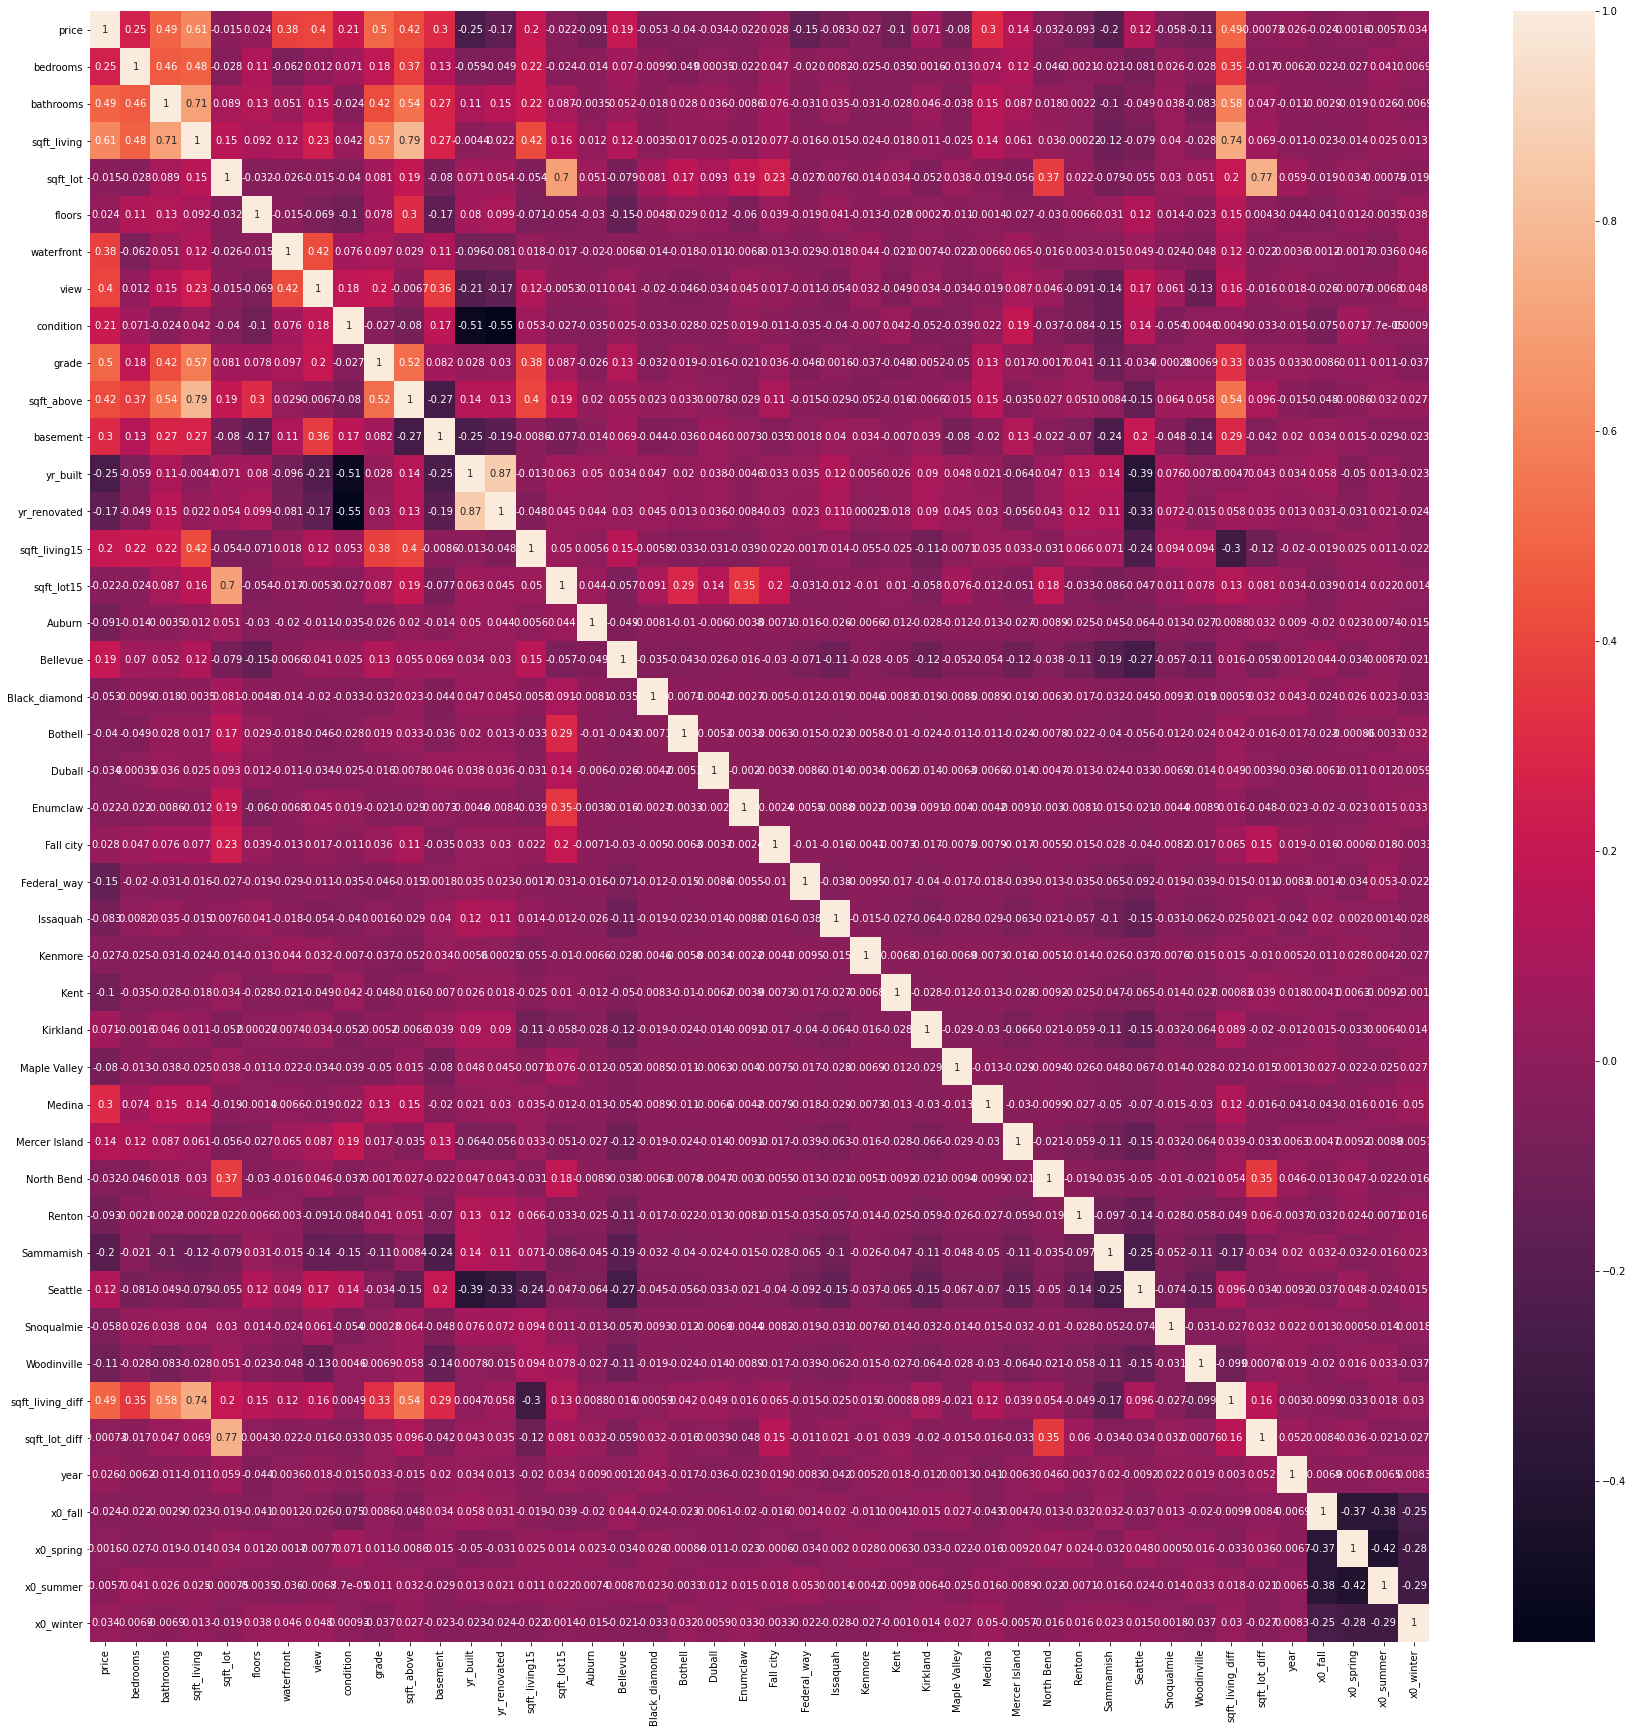

In [9]:
fig, ax = plt.subplots(figsize=(30,30))    
sns.heatmap(df.corr(), annot=True);

Interesting things: since year built and year renovated are so similar only 1 should really, be used, of the 2 year built has the stronger correlation, however it's a negative correlation indicating for higher class homes be older is desireable. 
-bathroom count has a much stronger correlation than bedroom but neither are super strong(combine?). 
-sqft lot is an extremely weak correlation (could be dropped)
-floors is also a ver weak correlation
-similarly sqft_living15 and sqft_lot15** are also very weak
-sqft_lot_diff is tiny(drop)

In [10]:
#expirement 1: drop year renovated
X = df.drop(['price','yr_renovated'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_1_lr = LinearRegression()
drop_1_lr.fit(X_train,y_train)

kcross_drop_1 = cross_val_score(drop_1_lr,X_train,y_train,cv=5)


kcross_drop_1

array([0.70662244, 0.68970824, 0.62329572, 0.71864176, 0.65876969])

In [11]:
drop_1_lr.score(X_train,y_train)

0.7065048209238918

Ok that helped a fair bit, let's also do independant tests of dropping the other possibilities

In [12]:
#expirement 2: drop sqft lot

In [13]:

X = df.drop(['price','sqft_lot'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_2_lr = LinearRegression()
drop_2_lr.fit(X_train,y_train)

kcross_drop_2 = cross_val_score(drop_2_lr,X_train,y_train,cv=5)


kcross_drop_2

array([0.70616046, 0.68344065, 0.63340264, 0.70771364, 0.6676966 ])

In [14]:
drop_2_lr.score(X_train,y_train)

0.7103786717297217

This also seems a bit better but not as much change as with dropping yr_renovated

In [15]:
#expirement 3: drop floors
X = df.drop(['price','floors'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_3_lr = LinearRegression()
drop_3_lr.fit(X_train,y_train)

kcross_drop_3 = cross_val_score(drop_3_lr,X_train,y_train,cv=5)


kcross_drop_3

array([0.70587708, 0.68106915, 0.63128227, 0.70910088, 0.6674617 ])

In [16]:
drop_3_lr.score(X_train,y_train)

0.7102135618225415

dropping this didn't really make much of a difference so we might want to further expirement with it later

In [17]:
#expirement 4:drop sqft_lot15
X = df.drop(['price','sqft_lot15'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_4_lr = LinearRegression()
drop_4_lr.fit(X_train,y_train)

kcross_drop_4 = cross_val_score(drop_4_lr,X_train,y_train,cv=5)


print(kcross_drop_4)
print(drop_4_lr.score(X_train,y_train))

[0.70615652 0.68355991 0.63162583 0.70728542 0.66741607]
0.7104086403301567


decent improvement: let's speed this up, by just dropping the bunch and seeing what happens

In [18]:
#test 5 mass drop
X = df.drop(['price', 'sqft_lot_diff', 'sqft_living15', 'sqft_lot', 'floors', 'sqft_lot15','yr_renovated'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_5_lr = LinearRegression()
drop_5_lr.fit(X_train,y_train)

kcross_drop_5 = cross_val_score(drop_5_lr,X_train,y_train,cv=5)


print(kcross_drop_5)
print(drop_5_lr.score(X_train,y_train))

[0.70380428 0.68954204 0.63652468 0.719109   0.6566056 ]
0.7048972023426302


overall dropping some of the weaker predictors hasn't affected much but since they'll muddle the model overall we should probably just leave them out

In [19]:
df.drop([ 'sqft_lot_diff', 'sqft_living15', 'sqft_lot', 'floors', 'sqft_lot15'], axis=1, inplace =True)

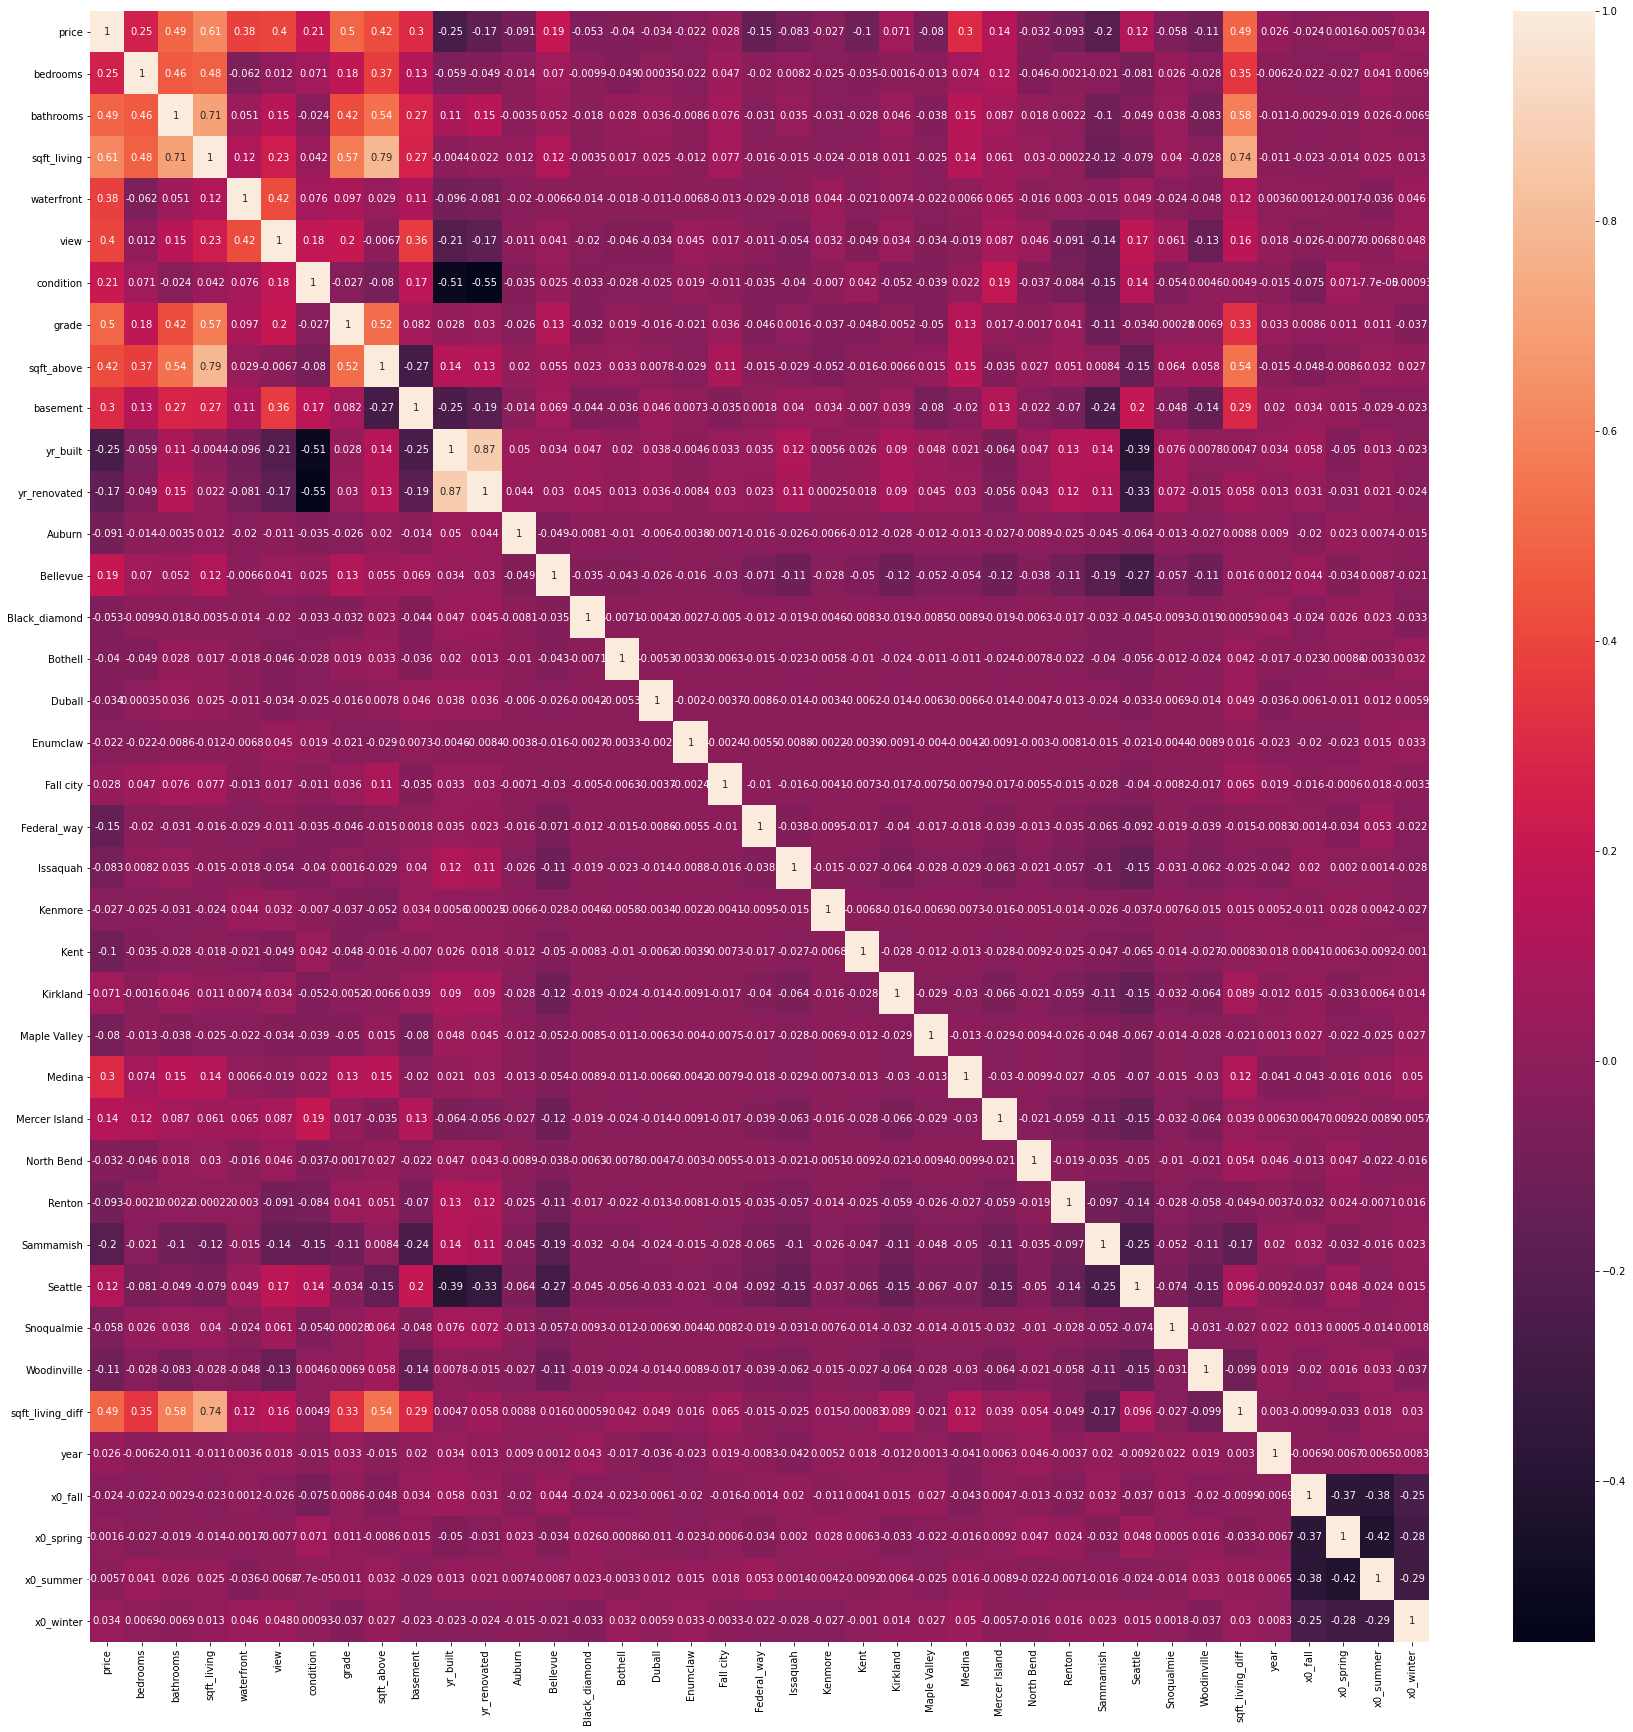

strategies for tommorow:
RFE could be used to find the strongest features and use them, for example I could do just the strongest 10 or so, see how that works
Polynomial testing could also be used to help optimize, purhapse I could combine the techniques, see what stats stand out and work up from there.
target: I would like to try and get up to at least 0.8 ish for an r^2 value
could scale and log the price
current 43ish columns, might want to cut down to 20ish, could be more efficent (needs testing(

For my first fix of the day I heard from my partners that they're models saw a lot of improvment from scaling and log transforming their price data so let's give that a try

In [32]:
X = df.drop(['price'], axis=1)
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)


print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.70318141 0.6831683  0.64387989 0.70869816 0.66545761]
0.7088860393259928


scaling alone didn't help much, let's s